In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
file_path = 'heart_disease.csv'
df = pd.read_csv(file_path)



In [12]:
df.head

<bound method NDFrame.head of       age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   


In [14]:
df.tail


<bound method NDFrame.tail of       age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   


In [3]:
print("DataFrame Information:")
print(df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [27]:
print("\nBasic Statistics:")
print(df.describe(include='all'))


Basic Statistics:
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359  

In [7]:
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
272


In [9]:
df_cleaned = df.drop_duplicates()
print(f"Original Number of Rows: {len(df)}")
print(f"Number of Rows After Removing Duplicates: {len(df_cleaned)}")

Original Number of Rows: 1190
Number of Rows After Removing Duplicates: 918


In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


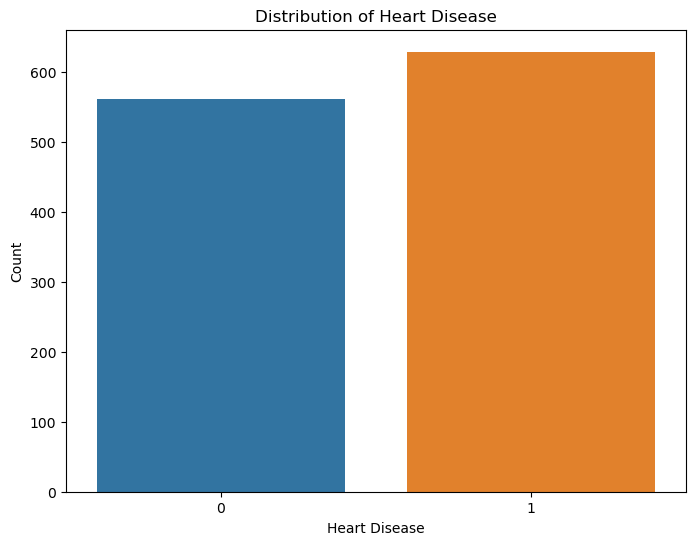

In [15]:

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

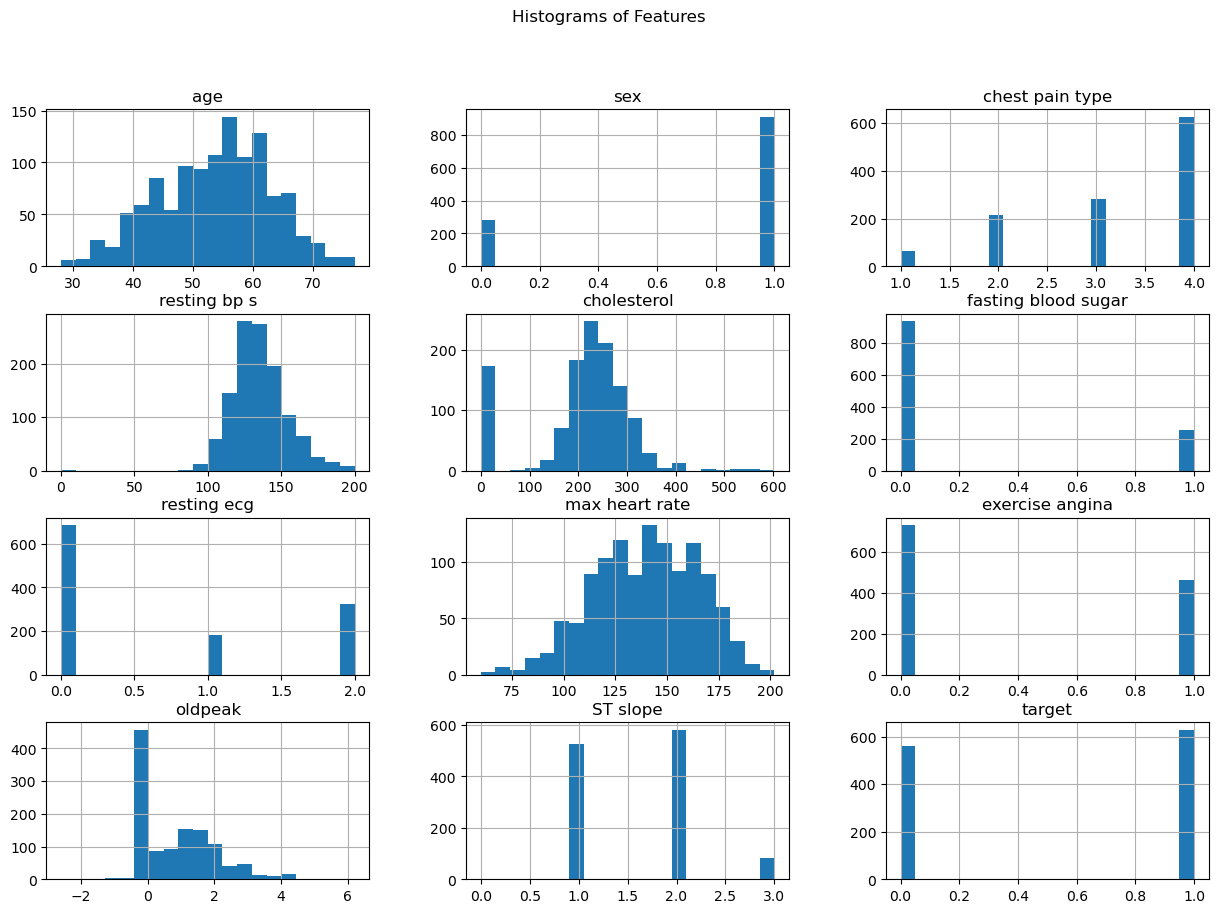

In [16]:
df.hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Features')
plt.show()

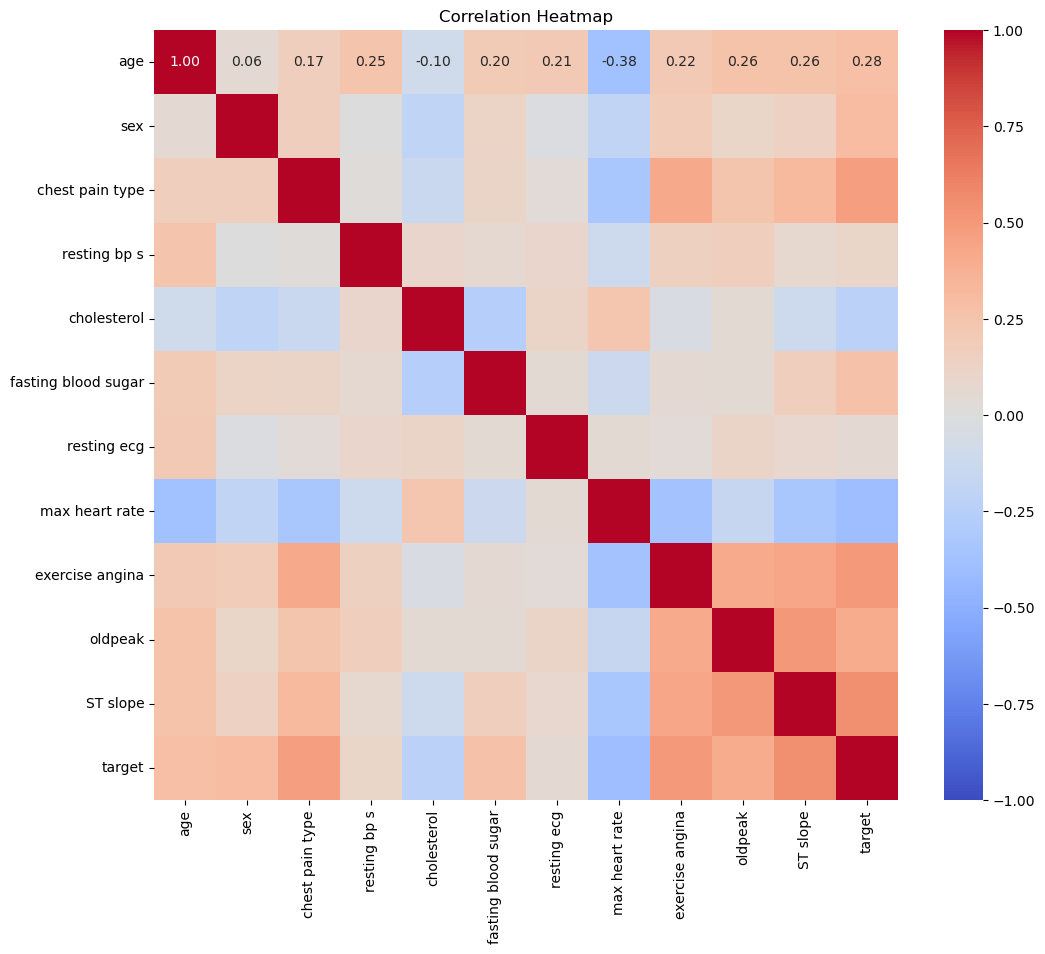

In [18]:
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.055750         0.165896      0.254399   
sex                  0.055750  1.000000         0.168254      0.005133   
chest pain type      0.165896  0.168254         1.000000      0.022168   
resting bp s         0.254399  0.005133         0.022168      1.000000   
cholesterol         -0.095282 -0.200092        -0.136139      0.100893   
fasting blood sugar  0.198039  0.120076         0.116703      0.070193   
resting ecg          0.213152 -0.018343         0.031383      0.097661   
max heart rate      -0.382045 -0.189186        -0.343654     -0.112135   
exercise angina      0.215793  0.190664         0.416625      0.155101   
oldpeak              0.258612  0.105734         0.245027      0.164803   
ST slope             0.261760  0.148282         0.317256      0.071477   
target               0.282039  0.305445         0.471354      0.107589   

                 

In [29]:
print("Feature Correlations:")
for feature in correlation_matrix.columns:
    print(f"{feature} correlations:\n{correlation_matrix[feature]}\n")

Feature Correlations:
age correlations:
age                    1.000000
sex                    0.055750
chest pain type        0.165896
resting bp s           0.254399
cholesterol           -0.095282
fasting blood sugar    0.198039
resting ecg            0.213152
max heart rate        -0.382045
exercise angina        0.215793
oldpeak                0.258612
ST slope               0.261760
target                 0.282039
Name: age, dtype: float64

sex correlations:
age                    0.055750
sex                    1.000000
chest pain type        0.168254
resting bp s           0.005133
cholesterol           -0.200092
fasting blood sugar    0.120076
resting ecg           -0.018343
max heart rate        -0.189186
exercise angina        0.190664
oldpeak                0.105734
ST slope               0.148282
target                 0.305445
Name: sex, dtype: float64

chest pain type correlations:
age                    0.165896
sex                    0.168254
chest pain type        1.0

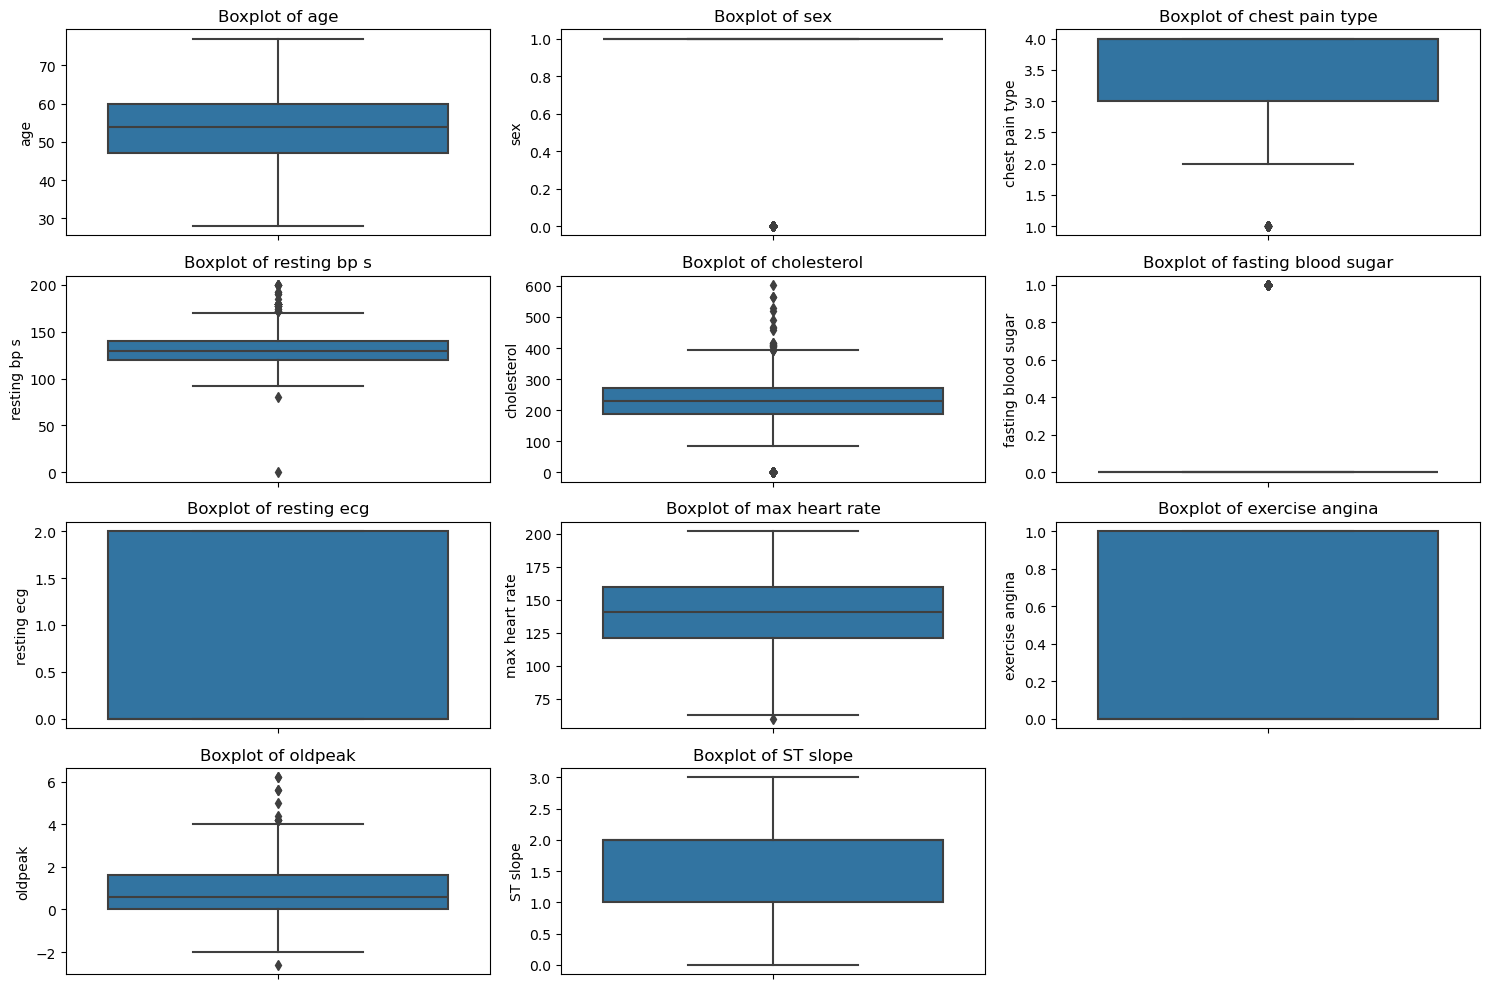

In [30]:
features = [
    'age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
    'fasting blood sugar', 'resting ecg', 'max heart rate', 
    'exercise angina', 'oldpeak', 'ST slope'
]

# Create a boxplot for each feature
plt.figure(figsize=(15, 10))  

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)  
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()  
plt.show()

In [21]:
df['age_max_heart_rate'] = df['age'] * df['max heart rate']
df['age_group'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30s', '40s', '50s', '60s', '70s'])


In [23]:
df = pd.get_dummies(df, columns=['age_group'])

In [25]:
scaler = StandardScaler()
df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']] = scaler.fit_transform(df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])

In [38]:

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'resting bp s', 'cholesterol', 'max heart rate']])
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())
df = pd.concat([df, df_poly], axis=1)

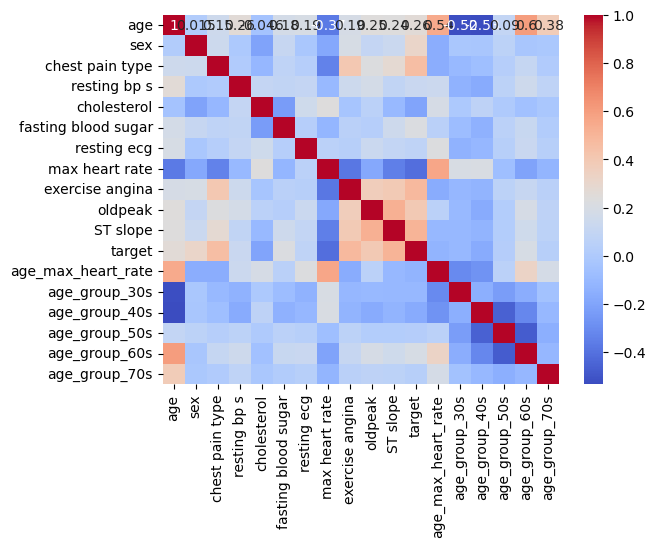

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [29]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
print("Shape of X:", X.shape)

Shape of X: (1190, 17)


In [33]:
print("Shape of y:", y.shape)

Shape of y: (1190,)


In [35]:
print("Columns in X:", X.columns)

Columns in X: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'age_max_heart_rate',
       'age_group_30s', 'age_group_40s', 'age_group_50s', 'age_group_60s',
       'age_group_70s'],
      dtype='object')


In [37]:
print("Value counts in y:")
print(y.value_counts())

Value counts in y:
target
1    629
0    561
Name: count, dtype: int64


In [39]:
print(y.head())

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
y_pred = log_reg.predict(X_test)

In [53]:
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

In [55]:
train_probs = log_reg.predict_proba(X_train)[:, 1]
test_probs = log_reg.predict_proba(X_test)[:, 1]

In [114]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[125  29]
 [ 19 184]]


In [116]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       154
           1       0.86      0.91      0.88       203

    accuracy                           0.87       357
   macro avg       0.87      0.86      0.86       357
weighted avg       0.87      0.87      0.86       357



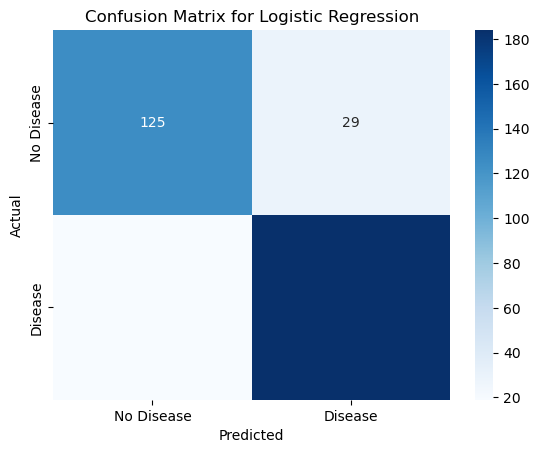

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [69]:
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Get the probability of class 1

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [73]:
roc_auc = roc_auc_score(y_test, y_prob)


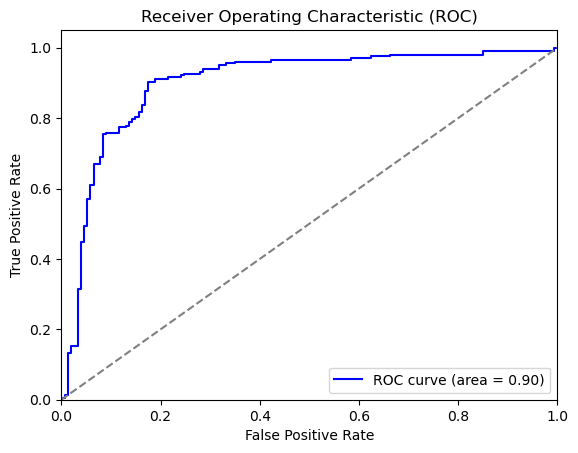

In [75]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [82]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

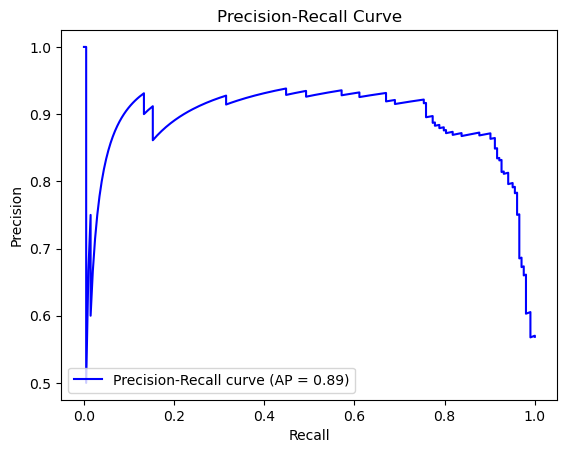

In [84]:
plt.figure()
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [88]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.90


In [122]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target


In [126]:
model = LogisticRegression(max_iter=1000)

In [134]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [136]:
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')


In [138]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_scores):.2f}")

Cross-validation scores: [0.80252101 0.84453782 0.84453782 0.80672269 0.86134454]
Mean cross-validation score: 0.83
Standard deviation of cross-validation scores: 0.02


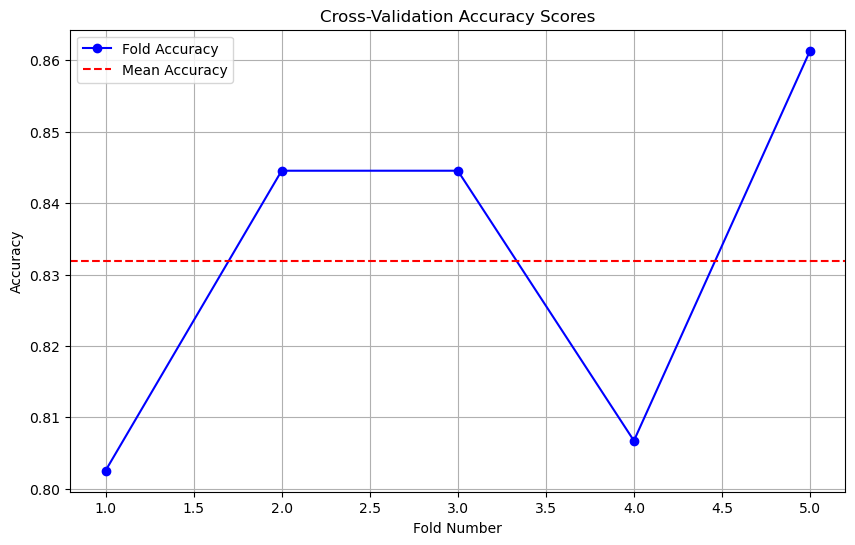

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import numpy as np 
import pandas as pd

In [63]:
X = df.drop('target', axis=1)
y = df['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred = model.predict(X_test)

In [71]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 98   9]
 [  4 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



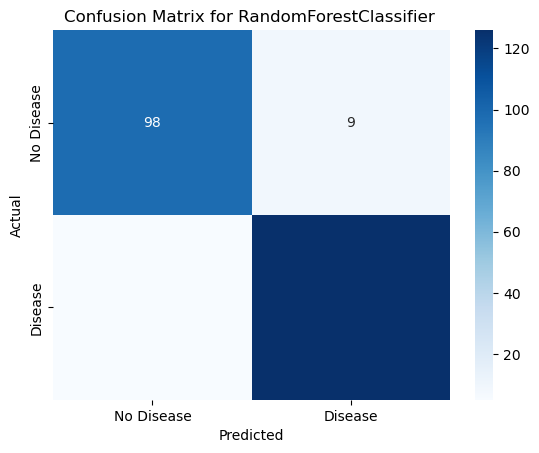

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForestClassifier ')
plt.show()

In [73]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class


In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

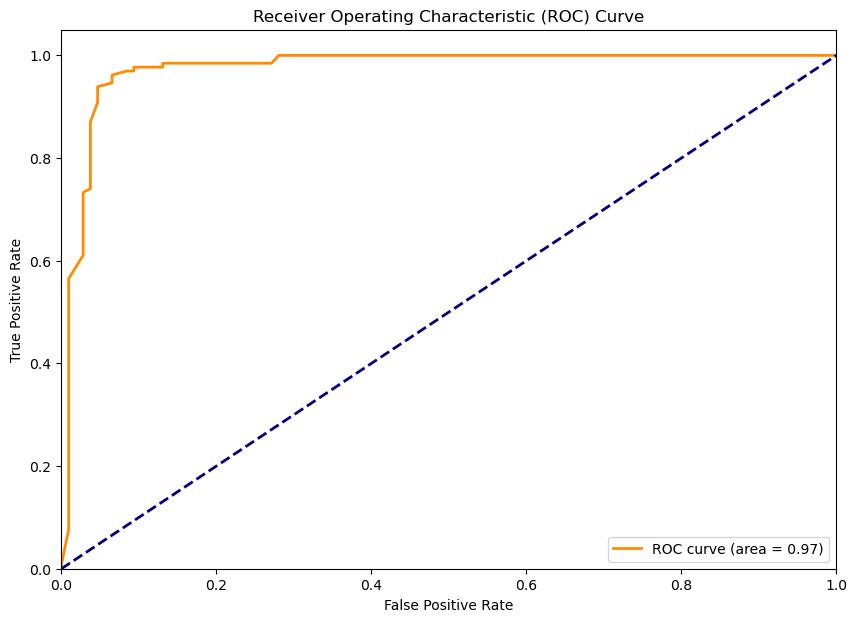

In [77]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [95]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [103]:
cv_results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=True)


In [105]:
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.4f}")


Cross-Validation Results:
Mean Accuracy: 0.9286
Mean ROC AUC: 0.9641


In [107]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"\nCross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean():.4f}")


Cross-Validation ROC AUC Scores: [0.95787611 0.92846514 0.97215136 0.97243481 0.98947704]
Mean ROC AUC Score: 0.9641


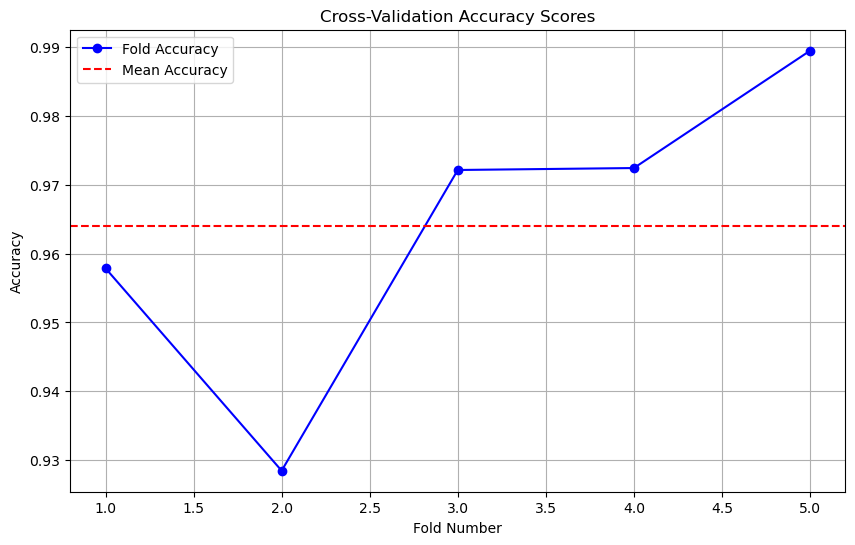

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.legend()
plt.grid(True)
plt.show()